In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción del dataset

La base de datos seleccionada es "Corporate Credit Rating with Financial Ratios", la cual fue obtenida de Kaggle (https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios). Esta base de datos proporciona información sobre las calificaciones crediticias corporativas emitidas por agencias especializadas entre 2010 y 2016, asi como diferentes resultados financieros de las empresas en el mismo periodo de tiempo.

# Descipcion de las variables

la base de datos contiene 25 variables, no obstante unicamente se utilizaran las siguientes 20 variables:

| Variable | Definición |
| --- | --- |
| Rating | Calificación crediticia emitida por la agencia de calificación. |
| Grado de inversión | Calificación crediticia binaria que indica si la calificación es de grado de inversión o de basura. |
| Current Ratio | Relación entre activos corrientes y pasivos corrientes. |
| Long-term Debt / Capital | Relación entre la deuda a largo plazo y el capital total de la empresa. |
| Debt/Equity Ratio | Relación entre la deuda total y el patrimonio de la empresa. |
| Gross Margin | Margen bruto de la empresa (ingresos totales menos costo de ventas). |
| Operating Margin | Margen operativo de la empresa (ingresos totales menos costos operativos). |
| EBIT Margin | Margen EBIT (ganancias antes de intereses e impuestos). |
| EBITDA Margin | Margen EBITDA (ganancias antes de intereses, impuestos, depreciación y amortización). |
| Pre-Tax Profit Margin | Margen de beneficio antes de impuestos. |
| Net Profit Margin | Margen de beneficio neto. |
| Asset Turnover | Rotación de activos (ingresos totales divididos por activos totales). |
| ROE - Return On Equity | Rentabilidad del patrimonio neto (beneficio neto dividido por patrimonio neto). |
| Return On Tangible Equity | Rentabilidad del patrimonio tangible neto. |
| ROA - Return On Assets | Rentabilidad de los activos (beneficio neto dividido por activos totales). |
| ROI - Return On Investment | Rentabilidad de la inversión (beneficio neto dividido por la inversión total). |
| Operating Cash Flow Per Share | Flujo de caja operativo por acción. |
| Free Cash Flow Per Share | Flujo de caja libre por acción. |


# Problema
El objetivo de este trabajo es simular el rol de un miembro de una empresa calificadora y desarrollar un modelo predictivo eficiente para asignar una calificación a una empresa. Para lograr esto, se buscará utilizar la menor cantidad posible de información y esfuerzo. En caso de que la empresa no alcance un grado de inversión, se pretende identificar las variables con mayor impacto y proporcionar recomendaciones para mejorar la calificación.

# Objetivos
## Objetivo General
* El objetivo general de este trabajo es desarrollar un modelo capaz de identificar, con la menor cantidad posible de información financiera, a qué grupo podría pertenecer una empresa.

## Objetivos Especificos
* Recolectar y seleccionar los datos financieros relevantes para el modelo predictivo, considerando que la cantidad de información debe ser mínima pero suficiente para hacer una predicción acertada.
* Realizar un análisis exploratorio de los datos recolectados para identificar patrones, tendencias y posibles relaciones entre las variables financieras y la calificación de la empresa.
* Seleccionar y aplicar las técnicas de análisis y modelado de datos más adecuadas para construir un modelo predictivo eficiente, considerando la complejidad de los datos y la necesidad de mantener la simplicidad del modelo.
* Evaluar la precisión y la eficiencia del modelo construido mediante la realización de pruebas y validaciones utilizando datos reales y comparando las predicciones del modelo con las calificaciones reales de las empresas.
* Identificar las variables financieras que tienen un mayor impacto en la calificación de una empresa y elaborar recomendaciones específicas para mejorar las áreas críticas.

# Hipotesis
Las hipotesis que se quiere resolver son:

* Existe una relación entre las variables financieras de una empresa y su calificación crediticia.
* Algunas variables financieras tienen un mayor impacto en la calificación crediticia de una empresa que otras.
* Un modelo predictivo puede ser construido utilizando técnicas de análisis y modelado de datos para predecir la calificación crediticia de una empresa con precisión aceptable, incluso cuando se dispone de una cantidad limitada de información financiera.
* El modelo predictivo puede ser utilizado para identificar las áreas críticas de una empresa que necesitan mejoras para aumentar su calificación crediticia.
* Las recomendaciones específicas proporcionadas por el modelo predictivo pueden ser útiles para las empresas en la toma de decisiones financieras y para mejorar su situación crediticia en general.

# Análisis de los datos

## Carga de datos

In [9]:
df =  pd.read_csv('CCR.csv',sep=',');

df.drop(['Rating Agency', 'Corporation', 'Sector','Rating Date', 'CIK', 'SIC Code', 'Ticker'], axis=1, inplace=True)

In [10]:
new_names = {
    'Rating': 'Rating',
    'Binary Rating': 'Investment_grade',
    'Current Ratio': 'CR',
    'Long-term Debt / Capital': 'LTDtC',
    'Debt/Equity Ratio': 'DtE',
    'Gross Margin': 'GM',
    'Operating Margin': 'OM',
    'EBIT Margin': 'EBIT',
    'EBITDA Margin': 'EBITDA',
    'Pre-Tax Profit Margin': 'PtPM',
    'Net Profit Margin': 'NetPM',
    'Asset Turnover': 'AT',
    'ROE - Return On Equity': 'ROE',
    'Return On Tangible Equity': 'ROTE',
    'ROA - Return On Assets': 'ROA',
    'ROI - Return On Investment': 'ROI',
    'Operating Cash Flow Per Share': 'OCFpS',
    'Free Cash Flow Per Share': 'FCFpS',
}

df.rename(columns=new_names, inplace=True)
df.columns

Index(['Rating', 'Investment_grade', 'CR', 'LTDtC', 'DtE', 'GM', 'OM', 'EBIT',
       'EBITDA', 'PtPM', 'NetPM', 'AT', 'ROE', 'ROTE', 'ROA', 'ROI', 'OCFpS',
       'FCFpS'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rating            7805 non-null   object 
 1   Investment_grade  7805 non-null   int64  
 2   CR                7805 non-null   float64
 3   LTDtC             7805 non-null   float64
 4   DtE               7805 non-null   float64
 5   GM                7805 non-null   float64
 6   OM                7805 non-null   float64
 7   EBIT              7805 non-null   float64
 8   EBITDA            7805 non-null   float64
 9   PtPM              7805 non-null   float64
 10  NetPM             7805 non-null   float64
 11  AT                7805 non-null   float64
 12  ROE               7805 non-null   float64
 13  ROTE              7805 non-null   float64
 14  ROA               7805 non-null   float64
 15  ROI               7805 non-null   float64
 16  OCFpS             7805 non-null   float64


# Preprocesamiento de Datos.

In [12]:
rating_dict = {'AAA': 21, 'AA+': 20, 'AA': 19, 'AA-': 18, 'A+': 17, 'A': 16, 'A-': 15,
               'BBB+': 14, 'BBB': 13, 'BBB-': 12, 'BB+': 11, 'BB': 10, 'BB-': 9,
               'B+': 8, 'B': 7, 'B-': 6, 'CCC+': 5, 'CCC': 4, 'CCC-': 3, 'CC': 2, 'CC+': 2,
               'C': 1, 'D': 0}

df['Rating'] = df['Rating'].map(rating_dict)

In [13]:
X , yR, yI = df.drop(['Rating', 'Investment_grade'], axis=1).values, df['Rating'].values, df['Investment_grade'].values

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, yR_train, yR_test, yI_train, yI_test = train_test_split(X, yR, yI, stratify=yR, test_size=0.3)

In [16]:
print(np.bincount(yR_train))
print(np.bincount(yR_test))

[  4   8  13   7  46 106 202 217 295 299 317 381 493 637 592 505 585 335
 178 129  51  63]
[  1   3   6   3  19  45  86  93 127 128 136 164 212 273 254 217 251 143
  76  56  22  27]


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [*range(1, 21, 1)]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10)

grid_search.fit(X_train, yI_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [26]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [40]:
k_values = 40

train_error = []
generalization_error = []

for nn in range(1, k_values+1):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, yR_train)
    train_error.append(1 - knn.score(X_train, yR_train))
    generalization_error.append(1 - knn.score(X_test, yR_test))

In [41]:
def plot_learning_curve(train_error, generalization_error):
  
  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, k_values + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, k_values + 1), generalization_error, label="Validación")
  plt.xticks(range(0, k_values + 1, 5))
  plt.xlabel("k-vecinos")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Punto de balance')
  plt.legend();

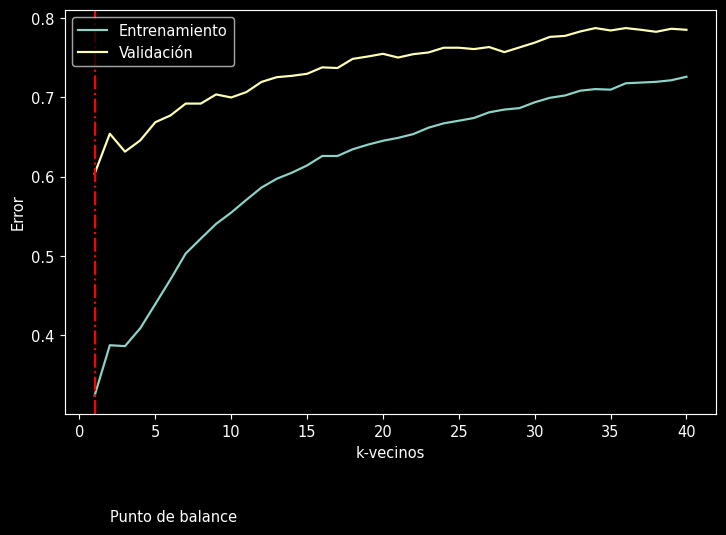

In [42]:
plot_learning_curve(train_error, generalization_error)